<a href="https://colab.research.google.com/github/Victor-KKKK/AI_study/blob/main/Deep_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets


In [ ]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))
#print(X)


In [ ]:
def scatter_plot():
  plt.scatter(X[y == 0, 0], X[y == 0, 1])
  plt.scatter(X[y == 1, 0], X[y == 1, 1])

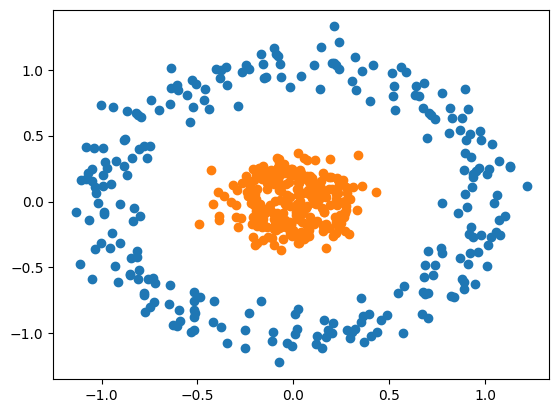

In [ ]:
scatter_plot()

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self,x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [ ]:
torch.manual_seed(2)
model = Model(2, 4, 1)
#print(list(model.parameters()))


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Text(0.5, 0, 'Epoch')

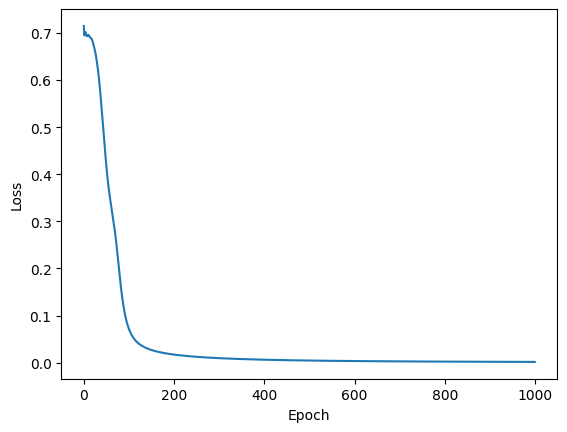

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

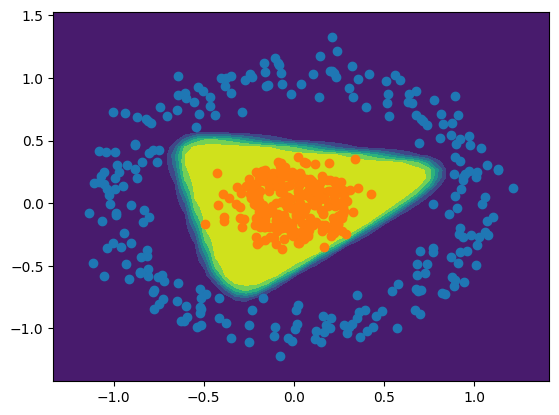

In [ ]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.2, max(X[:, 0])+0.2)
  y_span = np.linspace(min(X[:, 1]) -0.2, max(X[:, 1])+0.2)
  xx, yy = np.meshgrid(x_span, y_span)

  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  #print(z)
  plt.contourf(xx, yy, z, cmap='viridis')

plot_decision_boundary(X, y)
scatter_plot()

Prediction is  1


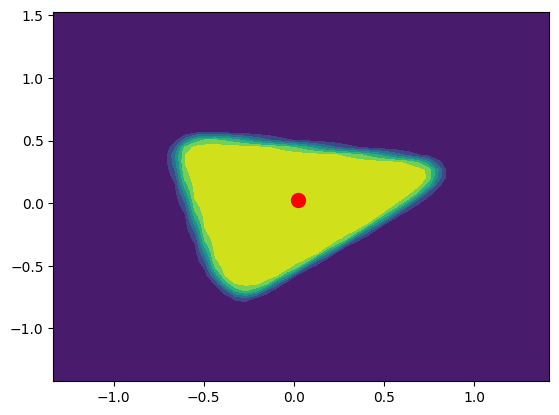

In [ ]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, markeredgecolor='red', markerfacecolor='red')
print("Prediction is ", prediction)
plot_decision_boundary(X, y)
